In [50]:
import pandas as pd
import re
import numpy as np
import nltk
import gc

In [51]:
articles= pd.read_csv (r'C:/Users/Ajit/Desktop/Web_mining_yegin/inshorts_articles.csv')
articles

,Article Link,Authors,Headline,Abstract
0,http://www.inshorts.com/en/news/people-coming-...,Nandini Sinha,People coming from Delhi to Noida to be random...,People coming from Delhi to Noida will be rand...
1,http://www.inshorts.com/en/news/colleges-unive...,Nandini Sinha,Colleges & universities in UP to reopen from N...,Degree colleges and universities across Uttar ...
2,http://www.inshorts.com/en/news/jharkhand-govt...,Nandini Sinha,Jharkhand govt withdraws ban on Chhath Puja ne...,Jharkhand CM Hemant Soren on Tuesday said that...
3,http://www.inshorts.com/en/news/shutting-delhi...,Sakshita Khosla,Shutting Delhi markets may prove counterproduc...,Traders' body CAIT on Tuesday said a proposal ...
4,http://www.inshorts.com/en/news/congress-not-a...,Sakshita Khosla,Congress not a part of Gupkar Alliance: Surjew...,Congress leader Randeep Surjewala on Tuesday c...
...,...,...,...,...
61984,http://www.inshorts.com/en/news/microsoft-team...,Aishwarya,Microsoft Teams to add 'virtual commute' for r...,"Microsoft Teams will be getting the ""virtual c..."
61985,http://www.inshorts.com/en/news/big-firms-dese...,Aishwarya,Big firms deserve scrutiny: Apple CEO on ongoi...,"Apple CEO Tim Cook, while talking about the on..."
61986,http://www.inshorts.com/en/news/will-restrict-...,Hiral Goyal,Will restrict content if US election turns cha...,"Facebook will take aggressive measures to ""res..."
61987,http://www.inshorts.com/en/news/whatsapp-to-ro...,Rishabh Bhatnagar,WhatsApp to roll out self-disappearing media f...,WhatsApp will reportedly soon roll out the sel...


In [52]:
from pandas import DataFrame
df = DataFrame (articles,columns=['Abstract'])
df['Abstract']
# type(df)

0        People coming from Delhi to Noida will be rand...
1        Degree colleges and universities across Uttar ...
2        Jharkhand CM Hemant Soren on Tuesday said that...
3        Traders' body CAIT on Tuesday said a proposal ...
4        Congress leader Randeep Surjewala on Tuesday c...
                               ...                        
61984    Microsoft Teams will be getting the "virtual c...
61985    Apple CEO Tim Cook, while talking about the on...
61986    Facebook will take aggressive measures to "res...
61987    WhatsApp will reportedly soon roll out the sel...
61988    TikTok has proposed a global coalition of soci...
Name: Abstract, Length: 61989, dtype: object

In [53]:
#cleaning
stopword=nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()
wn=nltk.WordNetLemmatizer()

In [54]:
def clean(text):
    text=re.sub(r'[^\w\s]',' ',text).lower()   
    words=re.split(r'\W+', text)                
    non_stop_words=[word for word in words if word not in stopword]       
    lem_words= [wn.lemmatize(word) for word in non_stop_words]            
    clean_text= ' '.join(lem_words)
    return clean_text

In [55]:
df['abstract']=df['Abstract'].apply(clean)

In [56]:
df

,Abstract,abstract
0,People coming from Delhi to Noida will be rand...,people coming delhi noida randomly tested coro...
1,Degree colleges and universities across Uttar ...,degree college university across uttar pradesh...
2,Jharkhand CM Hemant Soren on Tuesday said that...,jharkhand cm hemant soren tuesday said state g...
3,Traders' body CAIT on Tuesday said a proposal ...,trader body cait tuesday said proposal impose ...
4,Congress leader Randeep Surjewala on Tuesday c...,congress leader randeep surjewala tuesday crit...
...,...,...
61984,"Microsoft Teams will be getting the ""virtual c...",microsoft team getting virtual commute feature...
61985,"Apple CEO Tim Cook, while talking about the on...",apple ceo tim cook talking ongoing u antitrust...
61986,"Facebook will take aggressive measures to ""res...",facebook take aggressive measure restrict circ...
61987,WhatsApp will reportedly soon roll out the sel...,whatsapp reportedly soon roll self disappearin...


In [58]:
gc.collect()
from sklearn.feature_extraction.text import CountVectorizer
countvector=CountVectorizer()
vsm=countvector.fit_transform(df['abstract'])
pd.DataFrame(vsm.todense(), columns=countvector.get_feature_names())

MemoryError: Unable to allocate 31.3 GiB for an array with shape (61989, 67761) and data type int64

In [ ]:
def tokenize_and_stem(text):
    tokens = nltk.word_tokenize(text)
    stemmer = nltk.stem.porter.PorterStemmer()
    return [i for i in [stemmer.stem(t) for t in tokens] if len(i) > 2]

In [ ]:
#Vectorizer to exclude words with frequency less than 5% and more than 50%
from sklearn.feature_extraction.text import TfidfVectorizer
abs_tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=0.05, max_features=200000,
               stop_words='english', use_idf=True, tokenizer=tokenize_and_stem)
gc.collect()

In [59]:
import nltk
# nltk.download('punkt')

In [46]:
# import numpy as np
# a = np.zeros((700000), dtype='uint8')
# a.nbytes

In [60]:
tfidf_weights_abs = abs_tfidf_vectorizer.fit_transform(df['Abstract'])
pd.DataFrame(tfidf_weights_abs.todense(), columns=abs_tfidf_vectorizer.get_feature_names())

,...,case,claim,come,compani,coronaviru,countri,crore,day,dure,...,startup,state,test,thi,time,tweet,use,work,world,year
0,0.0,0.289616,0.0,0.560151,0.000000,0.529458,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.287425,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.000000,0.565857,0.0,0.0,0.000000,0.0,...,0.0,0.532742,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61984,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.416927,0.0,...,0.0,0.000000,0.000000,0.672909,0.000000,0.0,0.0,0.441313,0.0,0.0
61985,0.0,0.000000,0.0,0.339898,0.656405,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
61986,0.0,0.000000,0.0,0.000000,0.584899,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.558836,0.0,0.0,0.000000,0.0,0.0
61987,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.446912,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


In [48]:
#pip install -U gensim
get_ipython().system('python -m pip install -U gensim')

Requirement already up-to-date: gensim in c:\users\smit ajmera\anaconda3\lib\site-packages (3.8.3)


In [61]:
from gensim import models, corpora
dictionary=corpora.Dictionary(df['abstract'].str.split(' '))
corpus=[dictionary.doc2bow(text) for text in df['abstract'].str.split(' ')]
corpus[0:10]
lda=models.LdaModel(corpus, id2word=dictionary, num_topics=10)
lda.get_topics().shape

(10, 67803)

In [62]:
for i in  range(10):
    print(lda.print_topic(i))
lda.get_topic_terms(0)

0.054*"startup" + 0.030*"" + 0.017*"founded" + 0.016*"said" + 0.011*"based" + 0.007*"india" + 0.007*"founder" + 0.007*"billion" + 0.006*"technology" + 0.006*"platform"
0.034*"" + 0.016*"year" + 0.013*"old" + 0.012*"woman" + 0.011*"said" + 0.011*"police" + 0.009*"man" + 0.008*"found" + 0.007*"two" + 0.006*"video"
0.026*"" + 0.023*"year" + 0.022*"venture" + 0.020*"billion" + 0.008*"record" + 0.008*"world" + 0.008*"scientist" + 0.007*"last" + 0.007*"first" + 0.007*"earth"
0.030*"" + 0.016*"said" + 0.015*"u" + 0.015*"user" + 0.015*"nasa" + 0.015*"space" + 0.014*"video" + 0.009*"first" + 0.008*"twitter" + 0.008*"trump"
0.026*"" + 0.022*"said" + 0.012*"added" + 0.011*"brain" + 0.011*"angel" + 0.010*"sun" + 0.007*"people" + 0.007*"fashion" + 0.007*"like" + 0.006*"song"
0.054*"series" + 0.040*"musk" + 0.035*"google" + 0.022*"elon" + 0.020*"tesla" + 0.018*"" + 0.011*"spacex" + 0.008*"entrepreneur" + 0.008*"ceo" + 0.008*"sharma"
0.052*"researcher" + 0.042*"amazon" + 0.035*"flipkart" + 0.023*"" +

[(5502, 0.053974856),
 (0, 0.029626507),
 (15167, 0.016903205),
 (86, 0.015782194),
 (2053, 0.010762487),
 (285, 0.0071237395),
 (2393, 0.0069652586),
 (1226, 0.0068635773),
 (835, 0.006460852),
 (1983, 0.00642664)]

In [63]:
topic_words={}
for i in range(lda.num_topics):
    topic_words[i]=[dictionary[j] for (j, val) in lda.get_topic_terms(i)]

In [64]:
dataf = pd.DataFrame(topic_words)
dataf

,0,1,2,3,4,5,6,7,8,9
0,startup,,,,,series,researcher,,,
1,,year,year,said,said,musk,amazon,million,said,uber
2,founded,old,venture,u,added,google,flipkart,based,minister,study
3,said,woman,billion,user,brain,elon,,crore,president,said
4,based,said,record,nasa,angel,tesla,said,raised,government,based
5,india,police,world,space,sun,,stake,company,added,u
6,founder,man,scientist,video,people,spacex,moon,1,former,human
7,billion,found,last,first,fashion,entrepreneur,specie,funding,pm,ola
8,technology,two,first,twitter,like,ceo,new,round,state,could
9,platform,video,earth,trump,song,sharma,bezos,investor,modi,china


In [65]:
dataf

,0,1,2,3,4,5,6,7,8,9
0,startup,,,,,series,researcher,,,
1,,year,year,said,said,musk,amazon,million,said,uber
2,founded,old,venture,u,added,google,flipkart,based,minister,study
3,said,woman,billion,user,brain,elon,,crore,president,said
4,based,said,record,nasa,angel,tesla,said,raised,government,based
5,india,police,world,space,sun,,stake,company,added,u
6,founder,man,scientist,video,people,spacex,moon,1,former,human
7,billion,found,last,first,fashion,entrepreneur,specie,funding,pm,ola
8,technology,two,first,twitter,like,ceo,new,round,state,could
9,platform,video,earth,trump,song,sharma,bezos,investor,modi,china


In [66]:
topic_dist=list(lda[corpus])
topic_dist

[[(1, 0.39682055), (4, 0.12990415), (7, 0.2373267), (9, 0.22012037)],
 [(0, 0.43872607),
  (2, 0.079826035),
  (5, 0.043422706),
  (7, 0.15189639),
  (8, 0.27220818)],
 [(1, 0.2806547), (4, 0.51269394), (8, 0.18821542)],
 [(4, 0.107770495),
  (5, 0.05550803),
  (6, 0.30606815),
  (7, 0.18165109),
  (8, 0.21920109),
  (9, 0.1204857)],
 [(0, 0.031753197), (6, 0.5372759), (8, 0.41386148)],
 [(1, 0.27420452), (6, 0.11472738), (8, 0.32137242), (9, 0.2738897)],
 [(2, 0.37010032), (7, 0.043506756), (8, 0.1129527), (9, 0.45758277)],
 [(0, 0.17879552), (1, 0.39639497), (3, 0.40578046)],
 [(0, 0.07261178),
  (1, 0.1323567),
  (4, 0.50414604),
  (8, 0.19163245),
  (9, 0.08674201)],
 [(1, 0.185527),
  (2, 0.069287114),
  (5, 0.0740281),
  (7, 0.31922498),
  (9, 0.3393958)],
 [(0, 0.039349232),
  (1, 0.12023755),
  (7, 0.1298851),
  (8, 0.6018973),
  (9, 0.095831975)],
 [(2, 0.03587744),
  (6, 0.2459346),
  (7, 0.034225043),
  (8, 0.6003836),
  (9, 0.06819815)],
 [(1, 0.7506072), (3, 0.10520204), (

In [67]:
from gensim import matutils
topic_dist=matutils.corpus2dense(topic_dist, lda.num_topics).T
topic_dist
with_topics=pd.concat([df, pd.DataFrame(topic_dist, index=df.index)], axis='columns')
with_topics

,Abstract,abstract,0,1,2,3,4,5,6,7,8,9
0,People coming from Delhi to Noida will be rand...,people coming delhi noida randomly tested coro...,0.000000,0.396821,0.000000,0.000000,0.129904,0.000000,0.000000,0.237327,0.000000,0.220120
1,Degree colleges and universities across Uttar ...,degree college university across uttar pradesh...,0.438726,0.000000,0.079826,0.000000,0.000000,0.043423,0.000000,0.151896,0.272208,0.000000
2,Jharkhand CM Hemant Soren on Tuesday said that...,jharkhand cm hemant soren tuesday said state g...,0.000000,0.280655,0.000000,0.000000,0.512694,0.000000,0.000000,0.000000,0.188215,0.000000
3,Traders' body CAIT on Tuesday said a proposal ...,trader body cait tuesday said proposal impose ...,0.000000,0.000000,0.000000,0.000000,0.107770,0.055508,0.306068,0.181651,0.219201,0.120486
4,Congress leader Randeep Surjewala on Tuesday c...,congress leader randeep surjewala tuesday crit...,0.031753,0.000000,0.000000,0.000000,0.000000,0.000000,0.537276,0.000000,0.413861,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
61984,"Microsoft Teams will be getting the ""virtual c...",microsoft team getting virtual commute feature...,0.492665,0.157104,0.000000,0.000000,0.186827,0.076134,0.000000,0.000000,0.073364,0.000000
61985,"Apple CEO Tim Cook, while talking about the on...",apple ceo tim cook talking ongoing u antitrust...,0.350227,0.119297,0.036280,0.177990,0.000000,0.084729,0.077258,0.000000,0.107946,0.040544
61986,"Facebook will take aggressive measures to ""res...",facebook take aggressive measure restrict circ...,0.244175,0.000000,0.000000,0.181468,0.000000,0.000000,0.197755,0.163674,0.086517,0.116135
61987,WhatsApp will reportedly soon roll out the sel...,whatsapp reportedly soon roll self disappearin...,0.488316,0.000000,0.047165,0.363235,0.000000,0.000000,0.000000,0.080581,0.000000,0.000000


In [68]:
with_topics.sort_values(by=0, ascending=False).head(10)

,Abstract,abstract,0,1,2,3,4,5,6,7,8,9
842,Facebook CEO Mark Zuckerberg on the launch of ...,facebook ceo mark zuckerberg launch whatsapp p...,0.976902,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
28152,GoAir has announced suspension of its internat...,goair announced suspension international opera...,0.927024,0.000000,0.0,0.000000,0.053733,0.000000,0.000000,0.000000,0.000000,0.000000
58486,Google India has partnered with the IT Ministr...,google india partnered ministry six month prog...,0.913445,0.000000,0.0,0.000000,0.000000,0.064319,0.000000,0.000000,0.000000,0.000000
25847,Taiwanese electronics manufacturer HTC announc...,taiwanese electronics manufacturer htc announc...,0.903960,0.000000,0.0,0.000000,0.000000,0.045614,0.028494,0.000000,0.000000,0.000000
10923,"Sonu Nigam, who's stranded in Dubai for the la...",sonu nigam stranded dubai last one month due c...,0.868111,0.107620,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4011,The Road Transport Corporation (RTC) bus servi...,road transport corporation rtc bus service res...,0.859633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.119843,0.000000,0.000000
33729,The Pakistan Cricket Board (PCB) has said that...,pakistan cricket board pcb said pay cut salary...,0.846971,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.082105,0.047679,0.000000
33645,"After Southampton, West Ham United have announ...",southampton west ham united announced pay cut ...,0.842084,0.000000,0.0,0.034813,0.000000,0.000000,0.105073,0.000000,0.000000,0.000000
58012,Alphabet's self-driving car company Waymo has ...,alphabet self driving car company waymo acquir...,0.842027,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.091343,0.000000,0.047376
56428,Travel booking platform MakeMyTrip's Founder D...,travel booking platform makemytrip founder dee...,0.834696,0.140287,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Sentiment Analysis


In [56]:
# !pip install -U textblob

In [71]:
from textblob import TextBlob

In [73]:
def get_sentiment(text):
    blob=TextBlob(text)
    return blob.sentiment

In [59]:
df['sentiment']=df['abstract'].apply(get_sentiment)

In [60]:
df

,Abstract,abstract,sentiment
0,People coming from Delhi to Noida will be rand...,people coming delhi noida randomly tested coro...,"(-0.5, 0.5)"
1,Degree colleges and universities across Uttar ...,degree college university across uttar pradesh...,"(0.0, 0.0)"
2,Jharkhand CM Hemant Soren on Tuesday said that...,jharkhand cm hemant soren tuesday said state g...,"(0.09, 0.36333333333333334)"
3,Traders' body CAIT on Tuesday said a proposal ...,trader body cait tuesday said proposal impose ...,"(0.0, 0.0)"
4,Congress leader Randeep Surjewala on Tuesday c...,congress leader randeep surjewala tuesday crit...,"(0.0787878787878788, 0.2792929292929293)"
...,...,...,...
61984,"Microsoft Teams will be getting the ""virtual c...",microsoft team getting virtual commute feature...,"(0.0, 0.25)"
61985,"Apple CEO Tim Cook, while talking about the on...",apple ceo tim cook talking ongoing u antitrust...,"(0.0, 0.55)"
61986,"Facebook will take aggressive measures to ""res...",facebook take aggressive measure restrict circ...,"(0.0, 0.03333333333333333)"
61987,WhatsApp will reportedly soon roll out the sel...,whatsapp reportedly soon roll self disappearin...,"(-0.1, 0.2)"


In [61]:
sentiment_series =df['sentiment'].to_list()

In [62]:
columns = ['polarity', 'subjectivity']

In [63]:
df = pd.DataFrame(sentiment_series, columns=columns, index=df.index)

In [64]:
df

,polarity,subjectivity
0,-0.500000,0.500000
1,0.000000,0.000000
2,0.090000,0.363333
3,0.000000,0.000000
4,0.078788,0.279293
...,...,...
61984,0.000000,0.250000
61985,0.000000,0.550000
61986,0.000000,0.033333
61987,-0.100000,0.200000


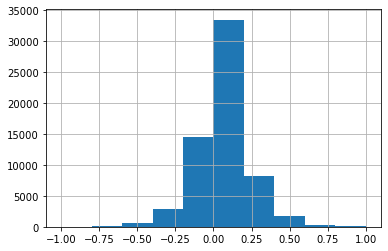

In [65]:
df.polarity.hist()

In [66]:
df.sort_values(by='polarity', ascending=False)

,polarity,subjectivity
24817,1.0,0.3
31736,1.0,0.3
9947,1.0,0.3
26071,1.0,0.3
33286,1.0,0.3
...,...,...
41236,-1.0,1.0
3804,-1.0,1.0
27836,-1.0,1.0
44684,-1.0,1.0
